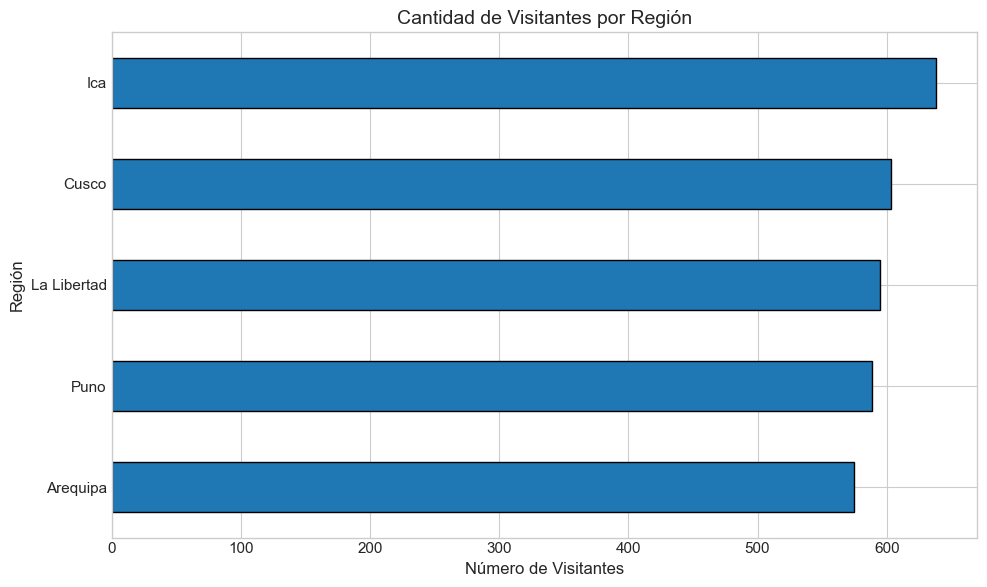

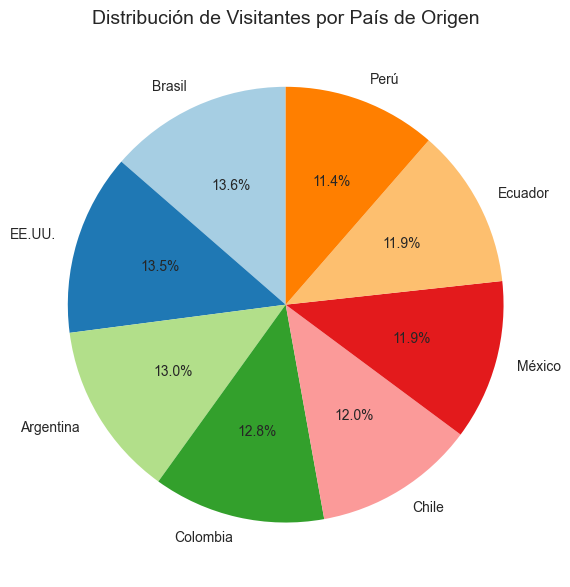

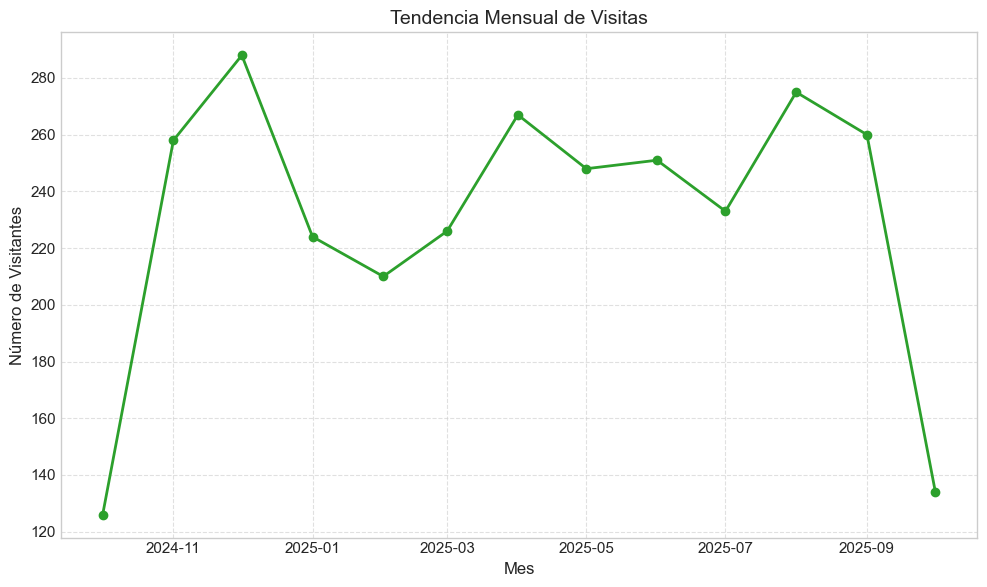

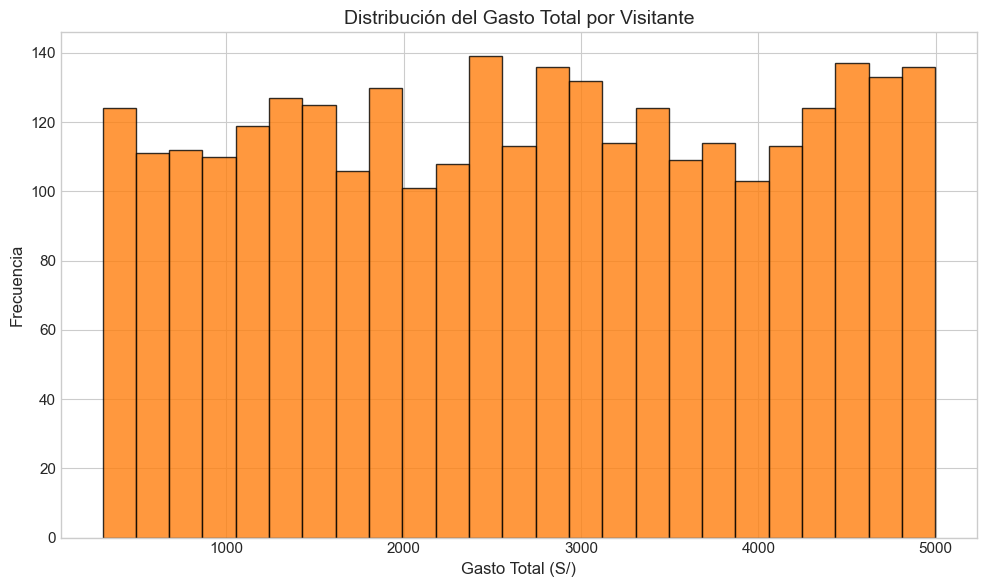

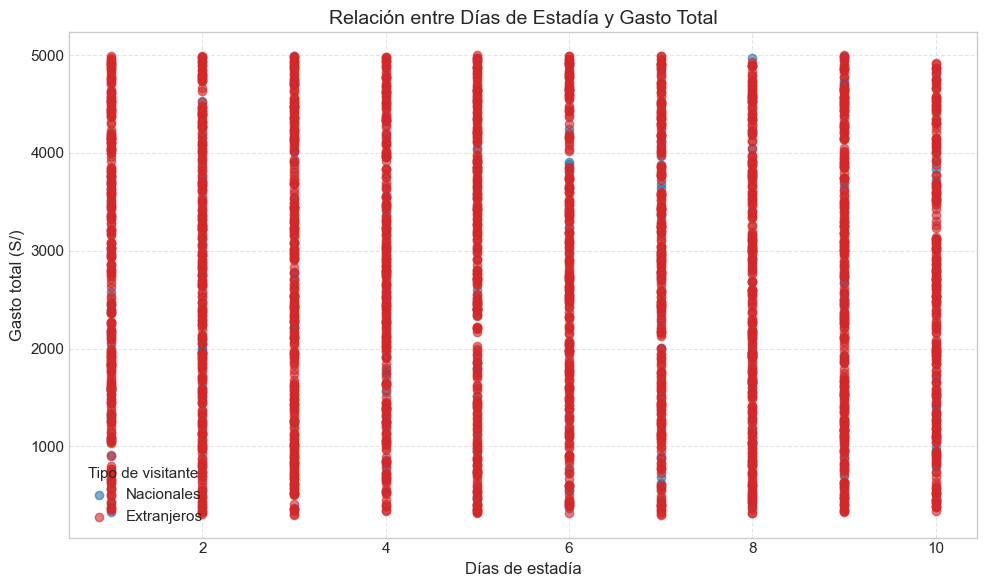

✅ Visualizaciones generadas correctamente.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración general del estilo de gráficos
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["font.size"] = 11

def main():
    root = Path.cwd().parent
    data_path = root / "data"
    df = pd.read_csv(data_path / "visitantes_clean.csv")

    # Asegurar que las fechas estén en formato datetime
    df["fecha_visita"] = pd.to_datetime(df["fecha_visita"])

    # 1️⃣ Gráfico de barras - Visitantes por región
    plt.figure()
    df["region"].value_counts().sort_values().plot(
        kind="barh", color="#1f77b4", edgecolor="black"
    )
    plt.title("Cantidad de Visitantes por Región")
    plt.xlabel("Número de Visitantes")
    plt.ylabel("Región")
    plt.tight_layout()
    plt.show()

    # 2️⃣ Gráfico circular - Distribución por país
    plt.figure()
    df["pais_origen"].value_counts().plot(
        kind="pie", autopct="%1.1f%%", startangle=90,
        colors=plt.cm.Paired.colors, textprops={"fontsize": 10}
    )
    plt.title("Distribución de Visitantes por País de Origen")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # 3️⃣ Gráfico de línea - Tendencia mensual
    visitas_mensuales = df.groupby(df["fecha_visita"].dt.to_period("M")).size()
    visitas_mensuales.index = visitas_mensuales.index.to_timestamp()

    plt.figure()
    plt.plot(visitas_mensuales.index, visitas_mensuales.values, 
             marker="o", color="#2ca02c", linewidth=2)
    plt.title("Tendencia Mensual de Visitas")
    plt.xlabel("Mes")
    plt.ylabel("Número de Visitantes")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 4️⃣ Histograma - Distribución del gasto total
    plt.figure()
    plt.hist(df["gasto_total"], bins=25, color="#ff7f0e", edgecolor="black", alpha=0.8)
    plt.title("Distribución del Gasto Total por Visitante")
    plt.xlabel("Gasto Total (S/)")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    # 💡 5️⃣ Dispersión - Días vs gasto (comparando nacionales y extranjeros)
    nacionales = df[df["pais_origen"] == "Perú"]
    extranjeros = df[df["pais_origen"] != "Perú"]

    plt.figure()
    plt.scatter(nacionales["dias_estadia"], nacionales["gasto_total"], 
                alpha=0.6, label="Nacionales", color="#1f77b4")
    plt.scatter(extranjeros["dias_estadia"], extranjeros["gasto_total"], 
                alpha=0.6, label="Extranjeros", color="#d62728")
    plt.title("Relación entre Días de Estadía y Gasto Total")
    plt.xlabel("Días de estadía")
    plt.ylabel("Gasto total (S/)")
    plt.legend(title="Tipo de visitante")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print("✅ Visualizaciones generadas correctamente.")

if __name__ == "__main__":
    main()
